# K_Means Clustering

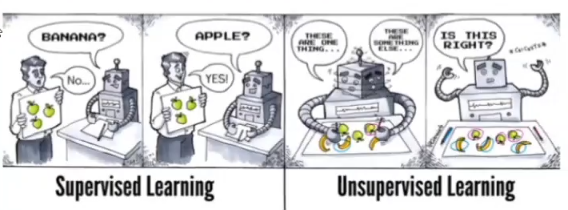

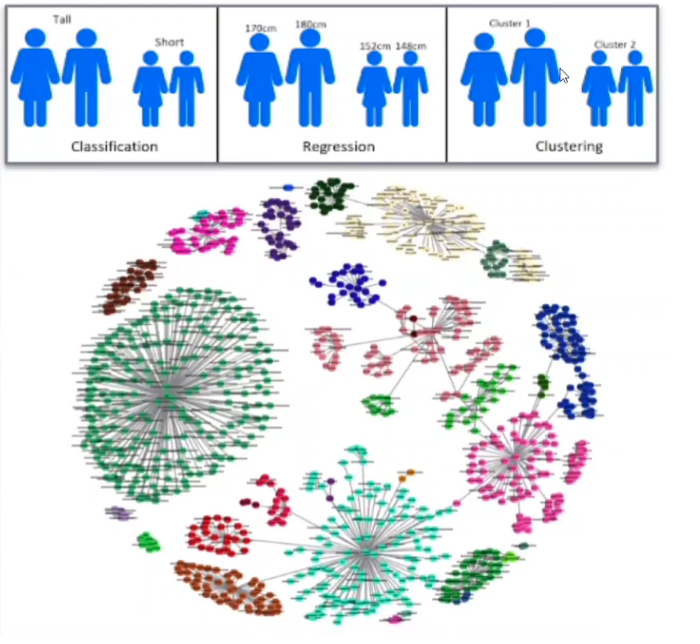

## Import Libraries

Denetimsiz Öğrenmenin Dezavantajları:

-Eğitilecek herhangi bir örnek verimiz olmadığı için sonucun doğruluk oranı az olabilir.

-Model, herhangi bir ön bilgi olmaksızın ham verilerden öğrenmektedir.

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

In [65]:
# Data seti içerisindeki paterlerden bir cluster çıkarmaya çalışıyor
# Müşteri segmantasyonunda iyi çalışır. (Çankayadaki bir ailenin alışveriş alışkanlığı ile keçiörendeki ailenin aynı değil)
# mesafelere tabanlı çalışıyor.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

In [67]:
df = pd.read_csv("iris_1.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [69]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


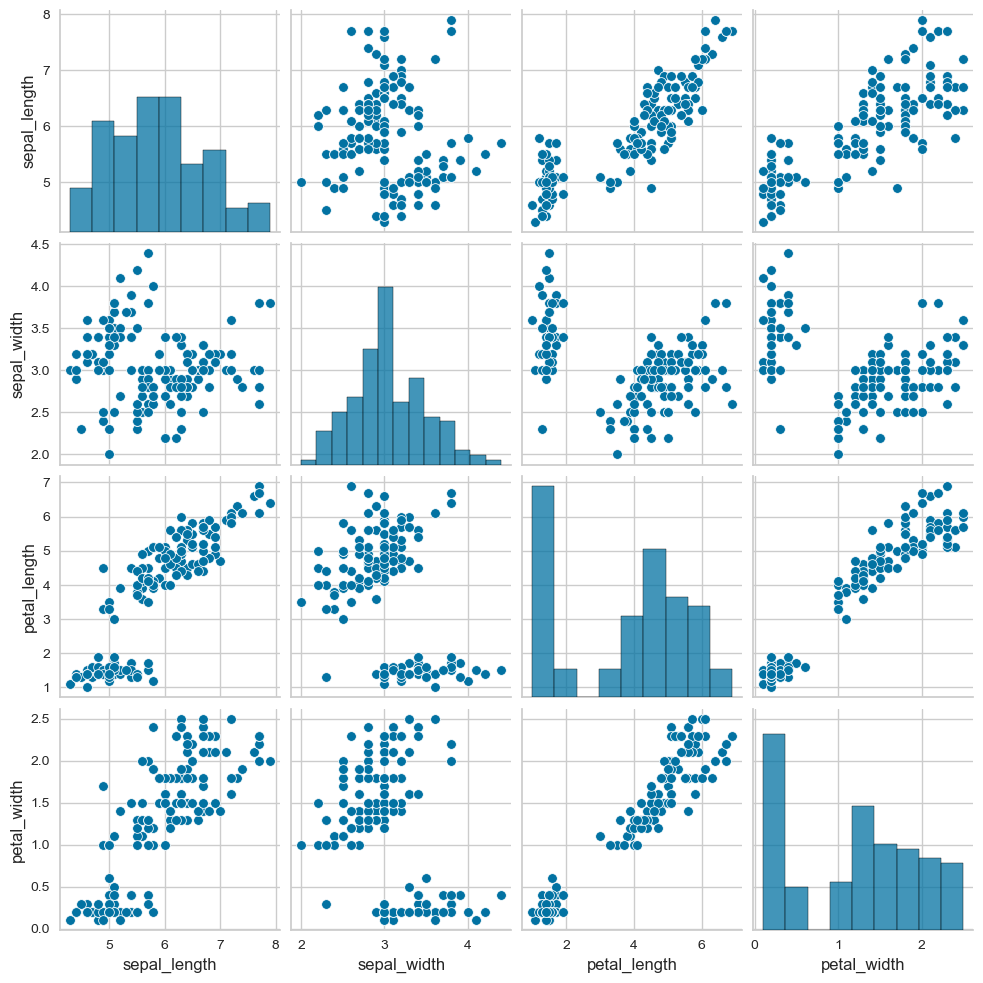

In [70]:
sns.pairplot(df)
plt.show()

In [71]:
# pairplotla kaç tane class old. görebiliyoruz (tahmin edebiliyoruz)

## Scaling Data

K-means algoritması, verilerin ölçeklenmesine duyarlıdır çünkü öklidyen mesafeye dayanır. Bu nedenle, özelliklerin değer aralıkları birbirinden farklıysa, ölçeklendirme genellikle algoritmanın daha iyi sonuçlar vermesine yardımcı olur.

Ancak, tüm özellikler zaten benzer bir değer aralığında ise, veriyi ölçeklendirmek her zaman daha iyi sonuçlar vermeyebilir. Hatta bazı durumlarda, özellikler arasındaki doğal varyansları azaltarak ölçeklendirme performansı kötüleştirebilir.

Bu yüzden, ölçeklendirme yapmanın veri kümeniz için uygun olup olmadığını belirlemek için her iki durumu **(ölçekli ve ölçeksiz) denemeniz** önerilir. Elde edilen kümelerin kalitesini ve algoritmanın performansını değerlendirerek hangi yöntemin daha iyi çalıştığına karar vermelisiniz.

## K_Means Clustering

In [72]:
X = df.copy() # target label olmadığı için datanın hepsini X e veririz ayrıca y olmayacak

In [73]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [74]:
X.shape

(150, 4)

In [75]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=42)

# "n_clusters = 8", default=8 (küme sayısı, ne kadar az class ile girilirse o kadar iyi olduğu için, yapılan kıyaslamalarda düşük olan tercih edilebilir)
# The number of clusters to form as well as the number of centroids to generate.
#cluster dan superwised algoritmaya gitmeye çalışıyorum.
# init= k-means++ --> yaptığı matematiksel işlemle grupları yoğun gördüğü yere atıyor. yani merkezi yakalamaya çalışıyor

In [76]:
K_means_model.fit_predict(X) ## 1. ve olması gereken seçenek

# eğittiğin modeli tekrar çağırmak için K_means_model.predict(X) ya da K_means_model.labels_ ile çağırıyorum

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [77]:
K_means_model.fit(X) ## 2. seçenek

KMeans(n_clusters=5, random_state=42)

In [78]:
K_means_model.predict(X)

# önce fit ettiğim modele göre getirir.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [79]:
K_means_model.labels_ 

# n_clusters=5 olduğu için 5 etiket olarak (clusters) yaptı 
 # Fit ayrı verilirse predict olarak çalıştırma bu şekilde çalıştır
# ayrı ayrı çalıştırırsam predict olarak algılayabiliyor.
# labels direk fit in sonuçlarını verir
# yeni bir data seti geldiğinde predict te cluster işlemi yaparken, label yapılmış olanın sadece etiketini verir.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

In [80]:
X["Classes"] = K_means_model.labels_ # bulduğumuz labels'leri df'e ekliyoruz

In [81]:
X

,sepal_length,sepal_width,petal_length,petal_width,Classes
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,4
148,6.2,3.4,5.4,2.3,4


In [82]:
# k_means 3 aşamadan oluşur

# 1- data kümelemeye uygun mu diye bakmak lazım (hopkins testle kümeleme yapılıp yapılamadığına bakıyoruz)
# data random dağılmalı

## Hopkins test

< 0.3 olmalı

Hopkins testi, veri kümesinin düzgün (uniform) bir dağılıma sahip olup olmadığını tahmin etmek için kullanılan bir istatistiksel testtir. Clustering Random data ister.

**Hopkins skoru 0'a yaklaşıyorsa**, bu, veri kümesinin düzgün bir dağılıma sahip **olmadığı** anlamına gelir. Bu durumda, veriyi sınıflandırmak için **kümeleme (clustering) yöntemleri kullanmak yararlı olabilir. (clustering e uygun demek).**

Ancak **Hopkins skoru belirli bir değerin (örneğin 0.3) üzerindeyse**, bu, veri kümesinin düzgün bir dağılıma sahip olduğu anlamına gelir. Bu tür bir durumda, kümeleme yöntemlerini kullanmak pek anlamlı olmayabilir. Literatürde 0.5 diyenlerde var hatta bıçak gibi 0.55 uygun değil dememek lazım. Best Practice.

Özetle, Hopkins testi, bir veri kümesinin düzgün bir dağılım gösterip göstermediğini ve bu bağlamda kümelemenin uygun olup olmadığını değerlendirmenizi sağlar.

- Binary yapılarda clustering uygun değildir

In [83]:
X = X.drop("Classes", axis =1)

In [84]:
#pip install pyclustertend #eskidendi

In [85]:
#from pyclustertend import hopkins #eskidendi

In [86]:
## HOPKINS TEST İÇİN MANUEL KOD

from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


# normalde bu fonksiyonumuz pyclustertend'ın hopkins kütüphanesinde var. Ancak oluşabilecek hatalara karşı 
# doğrudan fonksiyonun kendisini kullanacağız. Bundan dolayı pyclustertend'ı install etmemize gerek yoktur! 
                                                #!pip install pyclustertend --user
                                                # from pyclustertend import hopkins

In [87]:
X.shape

(150, 4)

In [88]:
hopkins(X, X.shape[0]) # test sonucu 0 yakınsa clusters için uygundur 

0.17900507239049512

In [89]:
hopkins(X, 60)

# 150 den fazla giremiyorum.
# büyük datalarda beklememek için sample için %10 - % 20 girilebilir. DAha büyük datalarda daha da küçültülebilir.

0.15202874372763445

# Choosing The Optimal Number of Clusters

## 1. method

### Elbow metod

**Inertia (Kümeler İçi Toplam Kareler):** Inertia, her veri noktasının küme merkezine olan uzaklığının karesinin toplamıdır. Düşük bir inertia değeri, veri noktalarının kendi küme merkezlerine daha yakın olduğunu gösterir, bu da genellikle iyi bir kümeleme olduğunu düşündürebilir. Ancak, inertia değeri, kümelerin sayısı arttıkça genellikle azalır. Bu nedenle, farklı küme sayıları için inertia değerlerini karşılaştırarak en uygun küme sayısını seçmek zordur.

- optimum cluster sayısına bakıyoruz

In [90]:
# cluster sayısına karar vermek için kullanıyoruz
# 2 model var 1. si inertia, 2. si distortion

In [91]:
ssd = [] ##inertia

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)
    
# data zaten tek başına bir küme old. için 2 ile başlıyorum.
# her k değeri için inertia değeri buluyorum.
# keskin dirseğin (düşüşün old.) old. yer optimum cluster sayısı

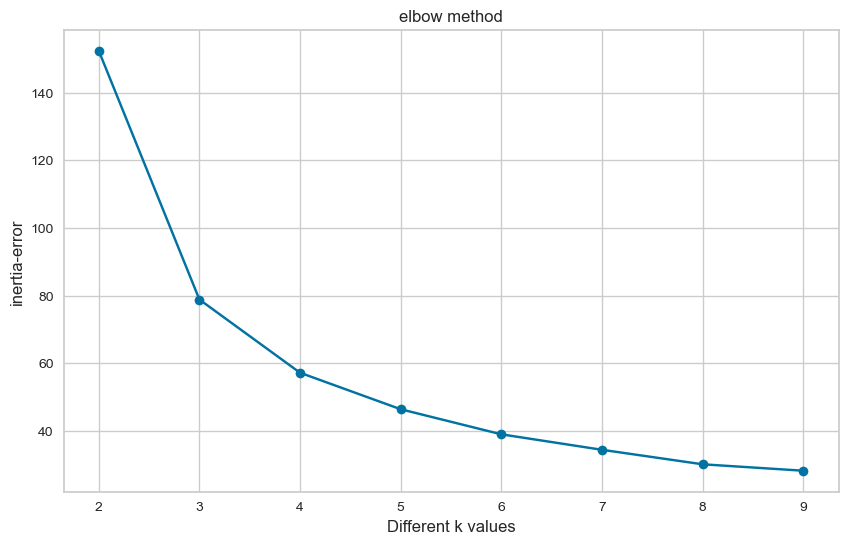

In [92]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

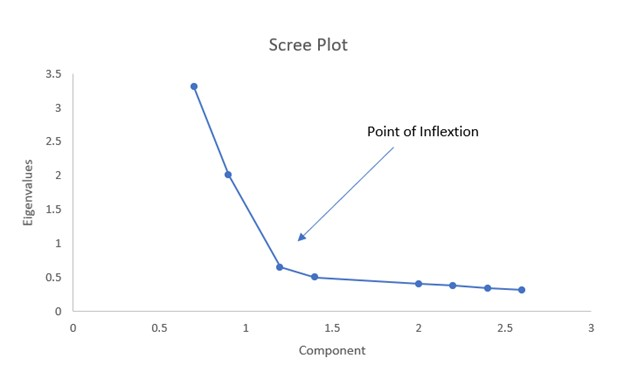

In [93]:
ssd # sum of squared distance

[152.34795176035792,
 78.85144142614602,
 57.22847321428572,
 46.44618205128205,
 39.03998724608725,
 34.46949589883801,
 30.186555194805194,
 28.289370851370848]

In [94]:
pd.Series(ssd).diff() 

# sadece DataFrame serieste çalışır. index sırasına göre satırların farkını alır. Bu skorlara oransal olarak bakılmalı. Aksi halde yanılırız

0          NaN
1   -73.496510
2   -21.622968
3   -10.782291
4    -7.406195
5    -4.570491
6    -4.282941
7    -1.897184
dtype: float64

In [95]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,73.496510
3,21.622968
4,10.782291
5,7.406195
6,4.570491
7,4.282941
8,1.897184


In [96]:
# sayılar index değil cluster sayısı (1,2....,8), karşısındaki sayılar da skorları. En sert düşüş 3 te

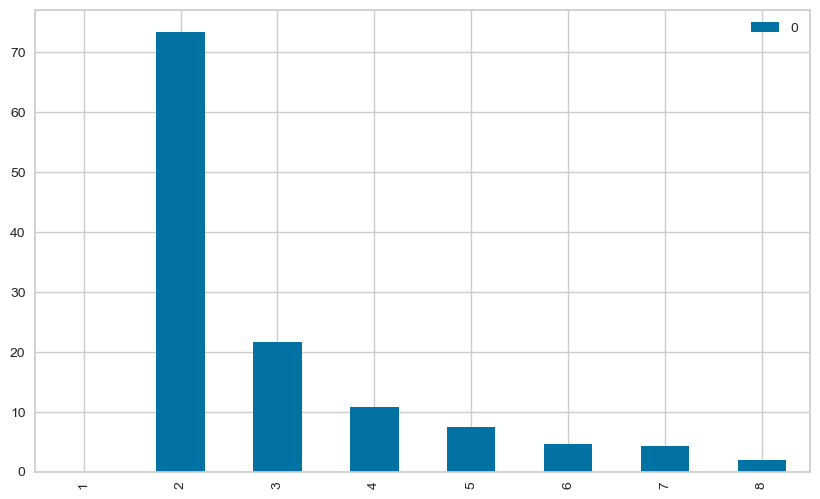

In [97]:
df_diff.plot(kind='bar');

### 2. method

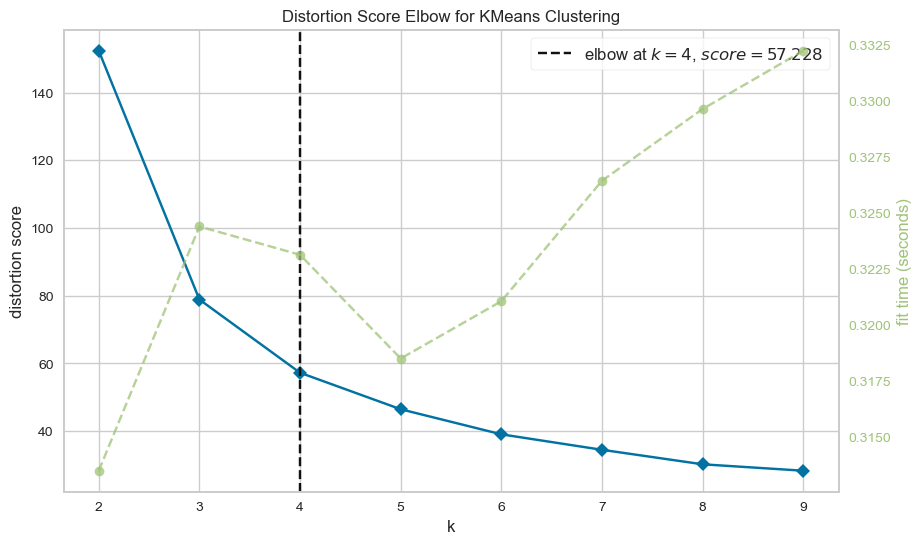

In [98]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

# inertia + Silhouette methodu kullanıyoruz daha çok

## Silhouette analysis

Silhouette analizi, kümeleme performansını değerlendirmek için kullanılan bir metriktir. Küme içi benzerliği ve kümeler arası benzerliği karşılaştırarak, kümelerin ne kadar iyi ayrıldığını gösterir. Silhouette değeri, her veri noktası için hesaplanır ve bu değerlerin ortalaması alınarak genel bir kümeleme kalitesi ölçümü elde edilir.

Silhouette değeri -1 ile 1 arasında değişir:

1: i veri noktası kendi kümesinde iyi yerleştirilmiş ve diğer kümelerden uzakta demektir.

0: i veri noktası iki küme arasında bir sınıra yakın demektir.

−1: i veri noktası yanlış bir kümeye atanmış demektir.

bu değerlerin "eşik" değerleri kesin bir şekilde belirlenmemiştir. Ancak, pratikte, ortalama silhouette değerinin yüksek olması (genellikle 0.5'ten büyük) kümelenmenin iyi olduğunu gösterirken, düşük değerler (genellikle 0.25'ten düşük) kümelenmenin iyi olmadığını veya daha iyi yapılabileceğini gösterebilir.

Silhouette, veri kümeleri içindeki tutarlılığın yorumlanması ve doğrulanması yöntemini ifade eder. Teknik, her bir nesnenin ne kadar iyi sınıflandırıldığının kısa ve öz bir grafik temsilini sağlar. Siluet değeri, bir nesnenin diğer kümelere kıyasla kendi kümesine ne kadar benzediğinin bir ölçüsüdür.

In [99]:
from sklearn.metrics import silhouette_score

In [100]:
silhouette_score(X, K_means_model.labels_)

0.48874888709310654

In [101]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6810461692117467
For n_clusters=3, the silhouette score is 0.5528190123564103
For n_clusters=4, the silhouette score is 0.49805050499728815
For n_clusters=5, the silhouette score is 0.48874888709310654
For n_clusters=6, the silhouette score is 0.36483400396700366
For n_clusters=7, the silhouette score is 0.3497481621161219
For n_clusters=8, the silhouette score is 0.3574536925852728


In [102]:
# inertia modeli (elbow) ile birlikte değerlerndirmek gerekiyor
# inertia 3 dedi, yellowbrick 4 dedi pairplotta ise 2 old. görmüştük

Siluet Skoru: Görselde her bir veri noktası için bir siluet değeri (katsayı) vardır. Bu değerler -1 ile 1 arasında değişir. 1'e yakın değerler iyi bir kümelemeyi, 0'a yakın değerler bir kümse sınırına yakın olan veri noktalarını ve -1'e yakın değerler ise yanlış bir kümseye atanmış veri noktalarını gösterir.

Kümelerin Boyutu: Görselde her küme için bir siluet grafiği vardır. Bu grafikler, kümelerin ne kadar homojen olduğunu ve kümeler arasındaki ayrımın ne kadar belirgin olduğunu gösterir.

Kırmızı Noktalı Çizgi: Bu çizgi, tüm veri noktaları için ortalama siluet skorunu gösterir. Bu çizginin üzerindeki kümeler genellikle iyi bir performansı gösterirken, bu çizginin altındaki kümeler daha düşük bir performansı gösterir.

Küme Genişlikleri: Her bir küme için siluet genişliği, o kümeye ait veri noktalarının siluet katsayılarını gösterir. Eğer tüm kümeler benzer genişliklere sahipse, bu, kümelerin benzer yoğunlukta ve boyutta olduğunu gösterir. Farklı genişliklerde kümeler, kümelerin boyut ve yoğunluklarının farklı olduğunu gösterir.

SilhouetteVisualizer'ı yorumlarken dikkat edilmesi gerekenler:

- Geniş siluetler (1'e yakın değerler) iyi bir kümeleme performansını gösterir.

- Dar veya negatif değerlere sahip siluetler, bu veri noktalarının muhtemelen yanlış kümeye atandığını gösterir.

- Eğer birçok veri noktası ortalama siluet skorunun (kırmızı noktalı çizgi) altındaysa, bu kümse sayısının gözden geçirilmesi gerektiğini gösterebilir.

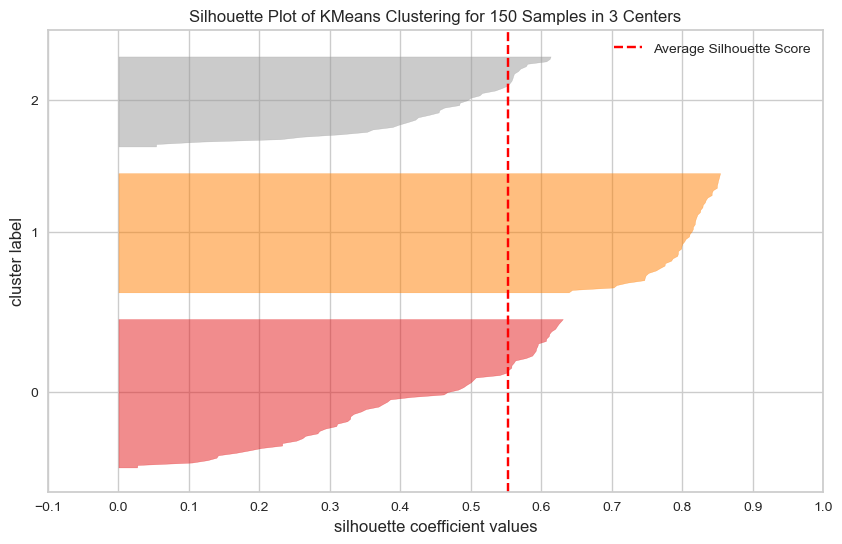

In [103]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

In [104]:
# 1 deki gibi olmalı ....

## Building the model based on the optimal number of clusters

In [105]:
model = KMeans(n_clusters =3, random_state=42)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [106]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [107]:
clusters = model.labels_

In [108]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [109]:
X["predicted_clusters"] = clusters

In [110]:
X

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [111]:
# alttakinde verimi bir uzmanın labelladığını düşün

In [112]:
labels = pd.read_csv("iris.csv") # dışarıdan aldığımız labels bilgileri 
labels

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [113]:
ct = pd.crosstab(X.predicted_clusters, labels.species) # ayrılan klaslara göre tahmin ve labels karşılaştırıyor.
ct
# 0. clusters 48 versicolor ve 14 virginica tahmin etmiş
# 1.   ''     50 setosa  tahmin etmiş 0 hata
# 2.   ''     36 virginica  ve 2 versicolor tahmin etmiş
# toplamda 16 hata yapmış
# doğru çalışıp çalışmadığını kontrol ediyoruz

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


## Adjust Rand Score

Rand İndeksi, tüm örnek çiftlerini göz önünde bulundurarak ve tahmin edilen ve gerçek kümelemelerde aynı veya farklı kümelere atanan çiftleri sayarak iki kümeleme arasında bir benzerlik ölçüsü hesaplar. Cezanladırma gibi bir hesabı vardır.

Rand indeksi, 0 ile 1 arasında bir değere sahiptir; 0, iki veri kümelemesinin herhangi bir nokta çifti üzerinde uyuşmadığını ve 1, veri kümelemelerinin tamamen aynı olduğunu belirtir.

0.1 ve altı : Uyum yok zayıf uyum

0.1 - 0.3    : Düşük bir uyum

0.3 - 0.5   : Orta derece uyum

0.5 - 1.0   : İyi uyum

In [114]:
from sklearn.metrics import adjusted_rand_score

In [115]:
X["labels"] = labels["species"]

In [116]:
adjusted_rand_score(X.labels, X.predicted_clusters)

# adjusted_rand_score(labels.species, X.predicted_clusters) --> hata almamak için 2. yöntem

0.7302382722834697

## Visualization Clusters

In [117]:
X_labels = X.labels.map({"versicolor":0, "setosa":1,"virginica":2})
X_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

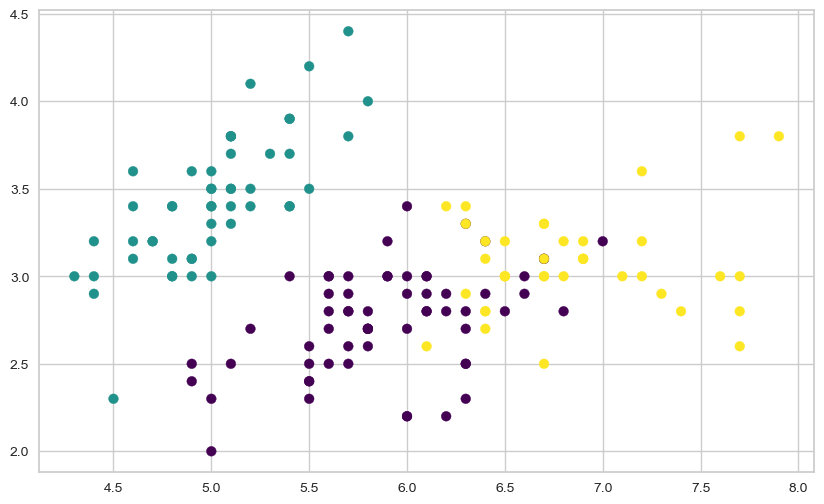

In [118]:
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis");

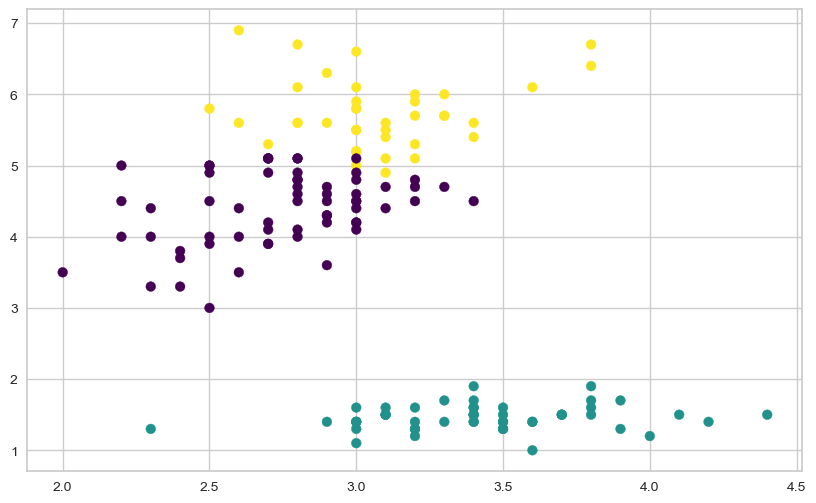

In [119]:
plt.scatter(X["sepal_width"], X["petal_length"], c = X.predicted_clusters, cmap = "viridis");

In [120]:
X[["sepal_length" , "sepal_width", "petal_length", "petal_width"]]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


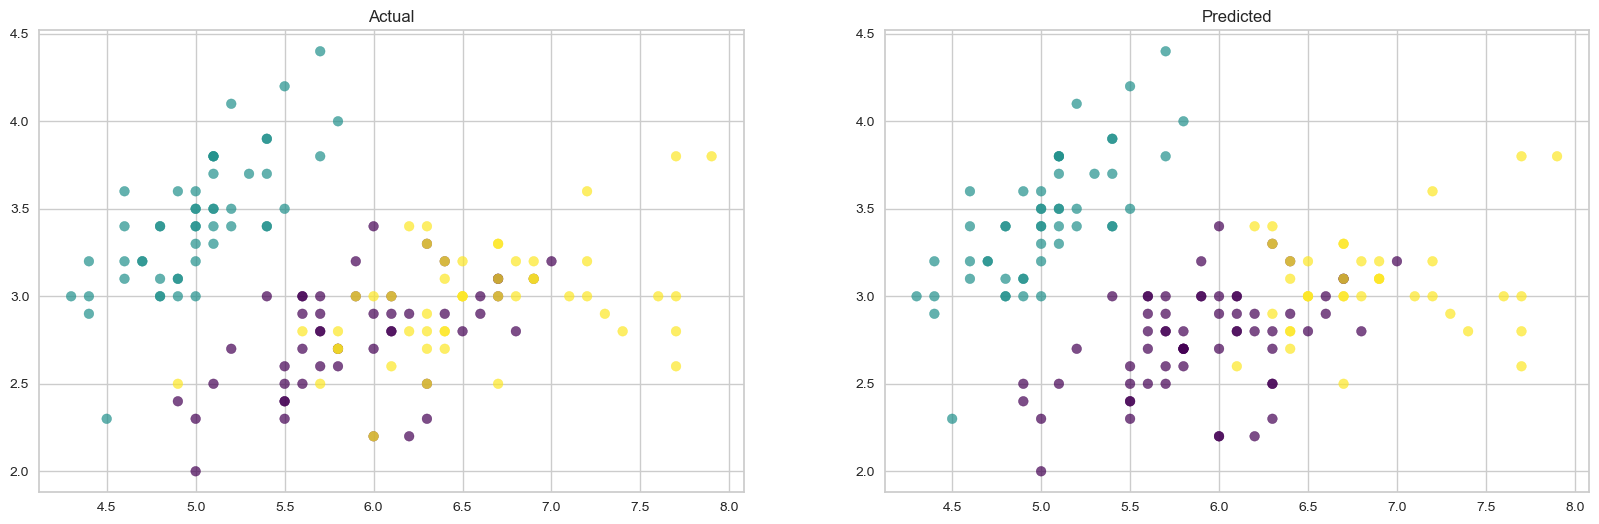

In [121]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X_labels, cmap = "viridis", alpha=0.7)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.title("Predicted");

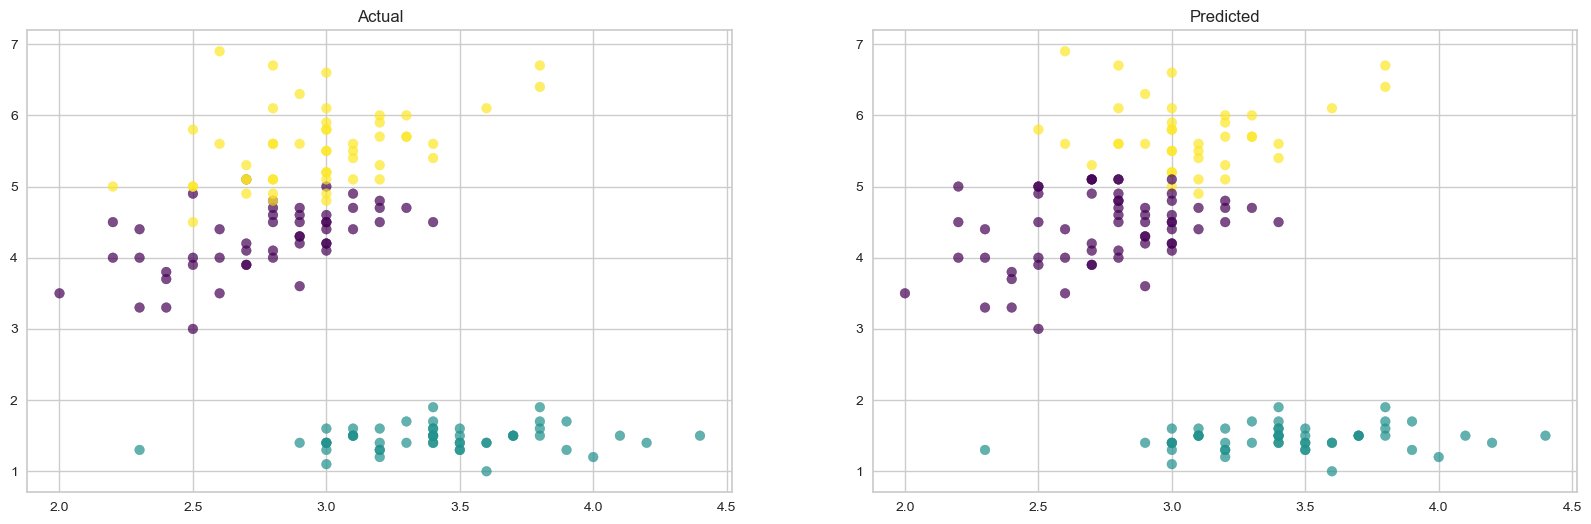

In [122]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_width"], X["petal_length"], c = X_labels, cmap = "viridis", alpha=0.7)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_width"], X["petal_length"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.title("Predicted");

In [123]:
X[["sepal_length" , "sepal_width", "petal_length", "petal_width"]].mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [124]:
# futures ort. değerleri

In [125]:
centers = model.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [126]:
# centroid ort. değerleri

In [127]:
centers[:,0] # centers of sepal_length feature

array([5.9016129, 5.006    , 6.85     ])

In [128]:
centers[:,1] # centers of sepal_width feature

array([2.7483871 , 3.428     , 3.07368421])

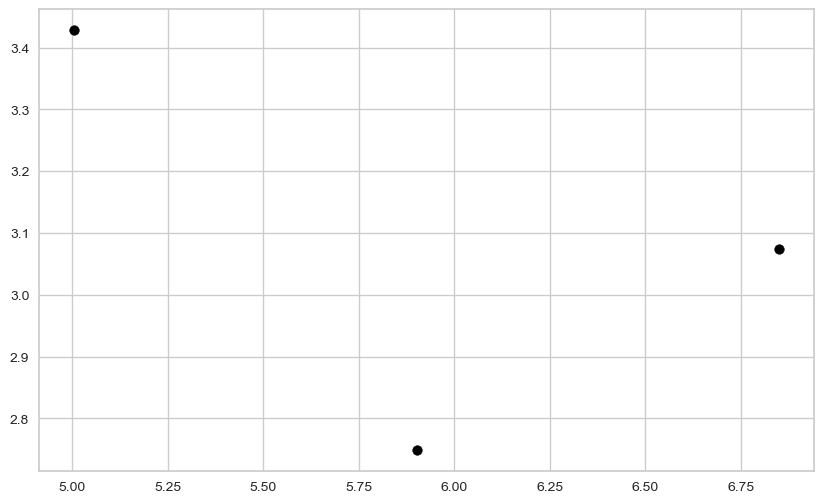

In [129]:
plt.scatter(centers[:,0], centers[:,1], c = "black")

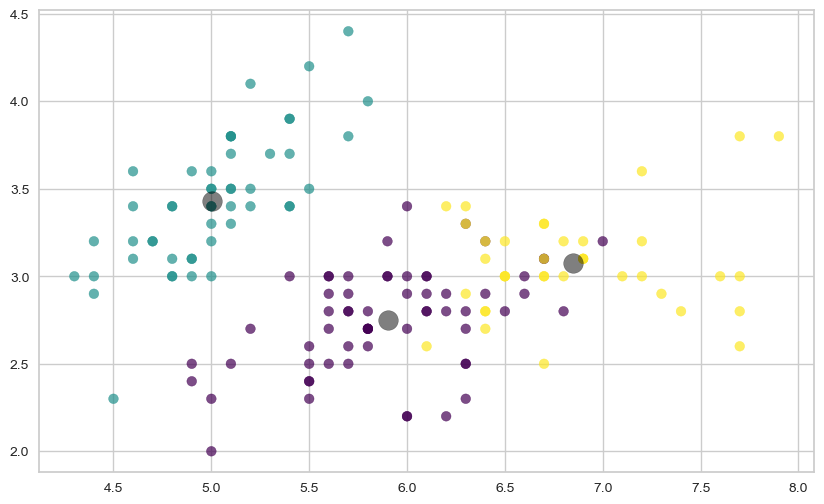

In [130]:
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

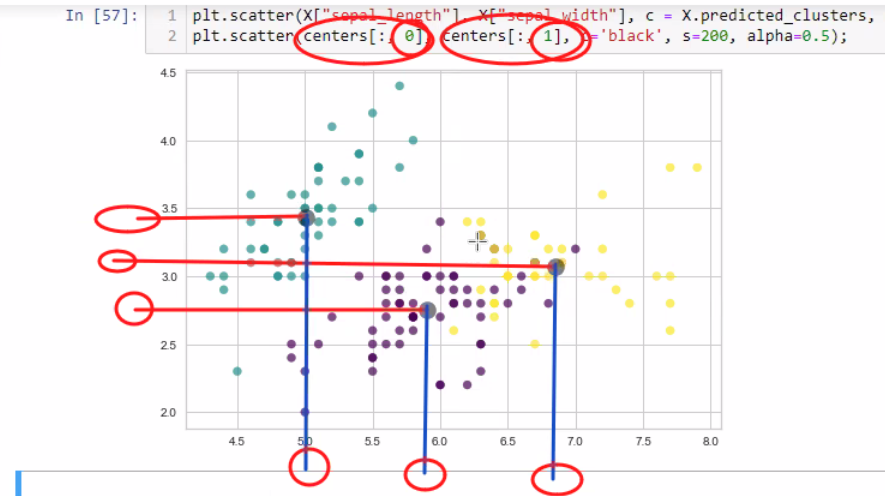

In [131]:
# 0 class ı ile 1 class ının center ları getirdi

## Remodeling according to discriminating features

In [132]:
# k_means performansını nasıl arttırırım??

In [133]:
X

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,0,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [134]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


In [135]:
X.iloc[:, :-1].head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [136]:
clus_pred = X.iloc[:, :-1].groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2
sepal_length,5.901613,5.006,6.850000
sepal_width,2.748387,3.428,3.073684
petal_length,4.393548,1.462,5.742105
petal_width,1.433871,0.246,2.071053


In [137]:
# kümelerin features lara göre ortalaması

<Axes: >

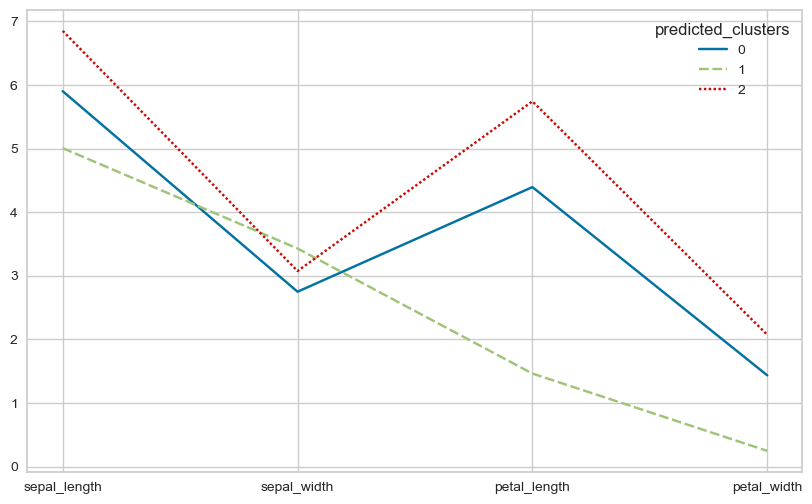

In [138]:
sns.lineplot(data = clus_pred) #bu görsel karar vermek için önemli

In [139]:
# ortalamaların nerede yakın nerede uzak olduğunu görmek istiyorum üstteki şekille

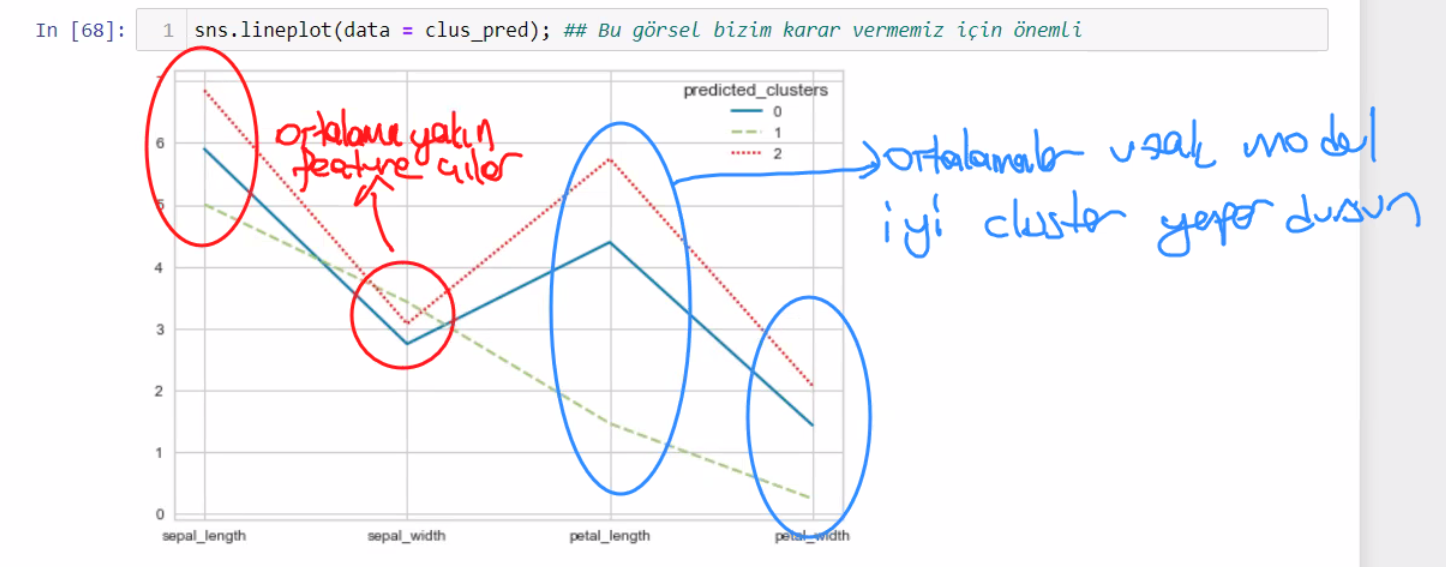

In [140]:
# sepal width te birbirine yakın ve buna göre tahmin yaparken yanılacak
# petal length ve petal width alıp modeli tekrar kur diyor bana şekil

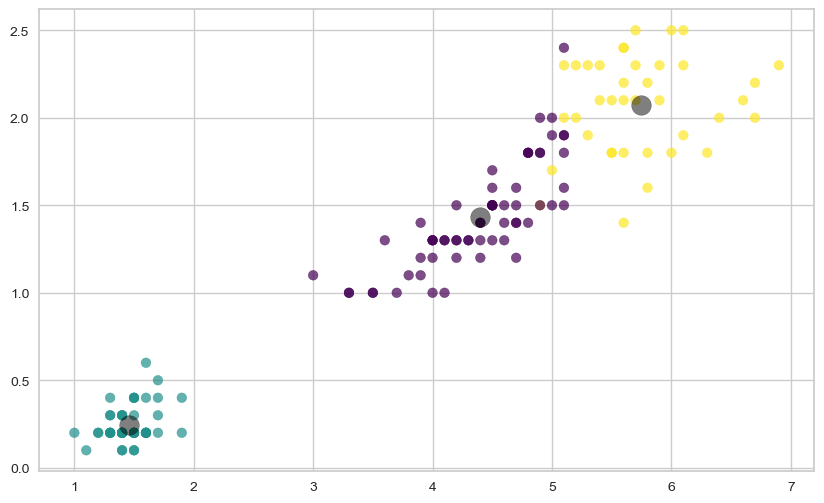

In [141]:
plt.scatter(X["petal_length"], X["petal_width"], c = X.predicted_clusters, cmap = "viridis", alpha =0.7)
plt.scatter(centers[:, 2], centers[:, 3], c='black', s=200, alpha=0.5)

In [142]:
X2 = X.iloc[:, [2,3]]
X2

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


## Hopkins test

In [143]:
hopkins(X2, X2.shape[0])

0.10817591486502463

In [144]:
# çok iyi skor aldım, 0 a yakın

## Elbow metod

In [145]:
ssd = []

K = range(2,10)

for k in K:
    model3 = KMeans(n_clusters =k)
    model3.fit(X2)
    ssd.append(model3.inertia_)

Text(0.5, 1.0, 'elbow method')

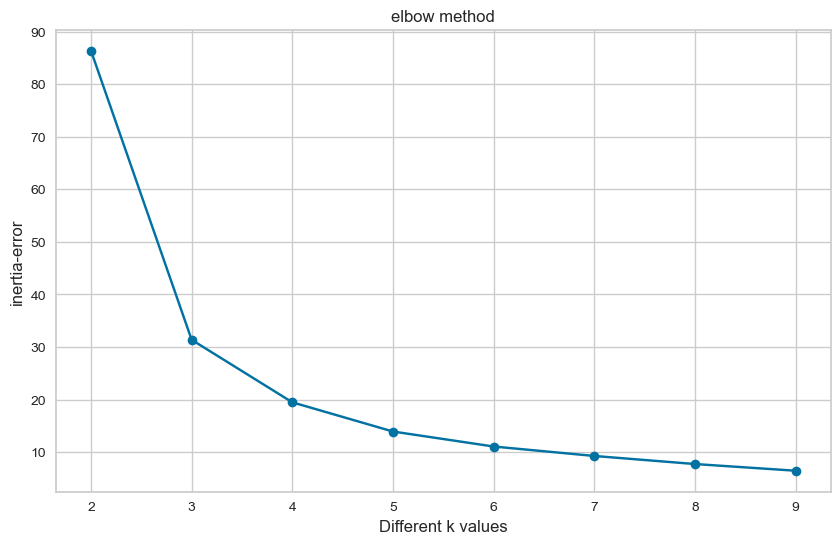

In [146]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [147]:
df_diff = pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,55.018861
3,11.894236
4,5.560215
5,2.853894
6,1.797379
7,1.535733
8,1.273409


<Axes: >

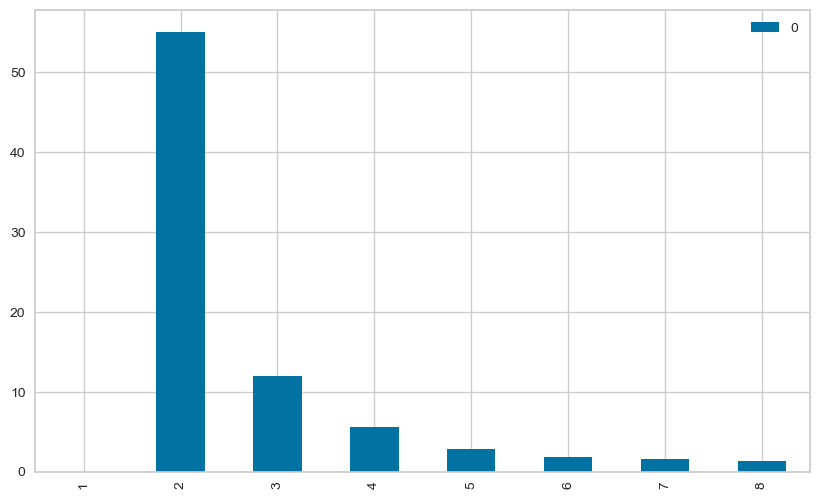

In [148]:
df_diff.plot(kind='bar')

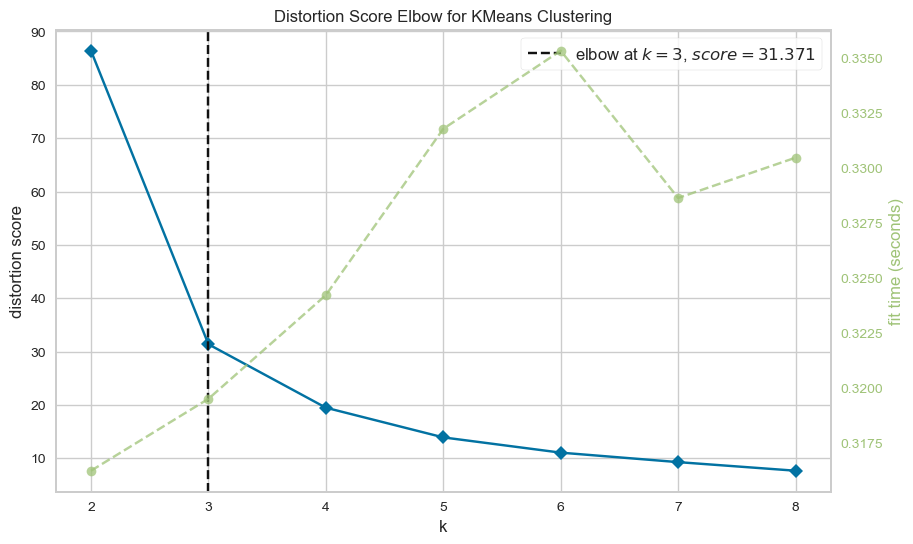

In [149]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

## Silhouette analysis

In [150]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.7653904101258123
For n_clusters=3, the silhouette score is 0.6604800083974887
For n_clusters=4, the silhouette score is 0.6127580794464402
For n_clusters=5, the silhouette score is 0.5883732712110276
For n_clusters=6, the silhouette score is 0.5767097832601947
For n_clusters=7, the silhouette score is 0.5640984340524553
For n_clusters=8, the silhouette score is 0.5902255624998716


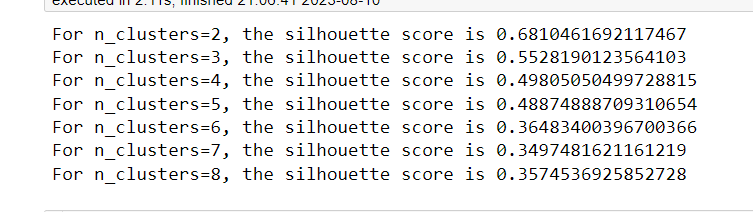

In [151]:
# 3. cluster da daha fazla artış olmuş o yüzden 3 class var diyorum uzman görüşünü alana kadar

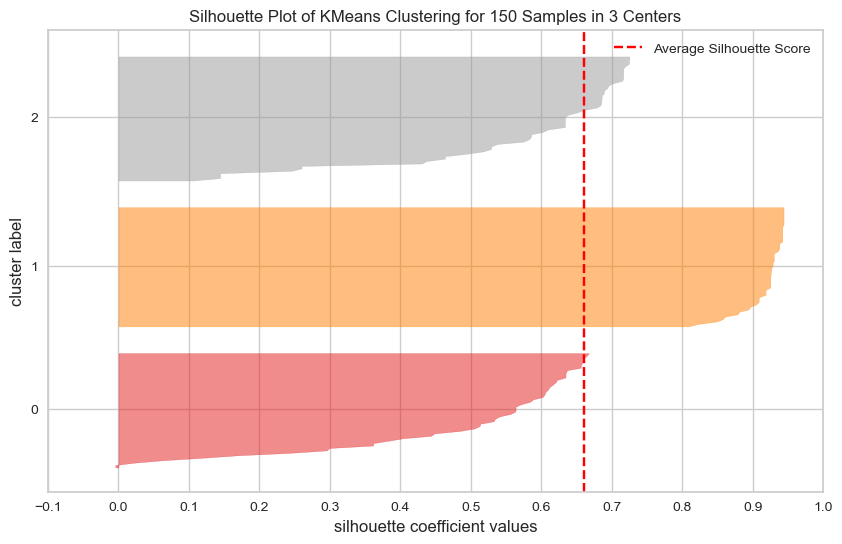

In [152]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

## Building the model based on the optimal number of clusters

In [153]:
final_model = KMeans(n_clusters =3, random_state=42)
final_model.fit_predict(X2)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [154]:
#final_model.labels_

In [155]:
X2["labels"] = labels.species

In [156]:
X2["predicted_clusters"] = final_model.labels_

In [157]:
X2.head()

,petal_length,petal_width,labels,predicted_clusters
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,1
3,1.5,0.2,setosa,1
4,1.4,0.2,setosa,1


## Adjust Rand Score

In [158]:
adjusted_rand_score(X2.labels, X2.predicted_clusters)

0.8856970310281228

## Compare results

In [159]:
# ct for 2 features
pd.crosstab(X2.predicted_clusters, X2.labels)

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,2,46
1,50,0,0
2,0,48,4


In [160]:
# ct for all features
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,48,14
1,50,0,0
2,0,2,36


In [161]:
#  versicolor":0, "setosa":1,"virginica":2

## Prediction cluster of new data

In [165]:
new_data = [[1.7, 0.2]]

In [166]:
final_model.predict(new_data)

array([1])

In [164]:
# yeni data yı predict olarak veriyorum, mevcut datayı labels ile çağırıyorum